# What is Pandas?

Pandas is a [package](https://data36.com/python-import-built-in-modules-data-science/) in Python, used for data formatting, analysis and manipulation. It gives you a way to deal with 2-D data structures (like SQL or Excel tables) in Python, which isn't "native" to the language. That's why we have to `import` the package. If you have Conda, you've already downloaded Pandas, we don't have to download it. By `import`-ing the package, we just allow the current .py or .ipynb file we're working on to use the functionality of the package.

### Why pandas?
- 2-D table-like data structures are intuitively known to us. Everyone is used to seeing Excel tables and this feels comfortable to work with. It is also what business people and other stakeholders will be used to seeing.
- It's one of the quickest ways to "automate the boring stuff" and lets you add value to any team quickly. 
- It plays well with other packages & libraries like `scikit-learn` and `matplotlib`.
- Excellent tools for transforming & cleaning data (i.e. resampling, filling missing values).
- Sits on top oy `numpy` - which can be fast if you vectorize calculations.

[For reference, you can use this great pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).

### When Pandas?

In other iterations of this course, participants asked where Pandas fits in the DS/ML pipeline. Let's focus on that!

<img src="../pics/ds_path.png">

[source](https://towardsdatascience.com/how-it-feels-to-learn-data-science-in-2019-6ee688498029)

<img src="../pics/ds_pipeline.png">

[source](https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955)

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.5.2'

## Python data types

A quick review of the basic data structures in Python:

In [3]:
#float
float(16)

16.0

In [4]:
#int
int(16)

16

In [5]:
#str
str(16)

'16'

In [6]:
#bool
bool(16)

True

In [7]:
#bool
bool(0)

False

In [8]:
#bool
bool(None)

False

## Pandas Data Types

Pandas has 2 main data structures:

- pd.Series:
    - 1-D data structure. Different from a numpy array in that each value has a unique ID.
    

- pd.DataFrame:
    - 2(+)-D data structure (better known as a table w/ named columns & numbered rows).
    
Here, we will focus on DataFrames:
- if you can do something in 2-D, you can also probably do it in 1-D.
- 2(+)-D data structures are much more useful to know how to work with in data science (you can't train a model with only 1 single array of data)
- the API between the Series can differ slightly (i.e. `pd.Series.name` vs `pd.DataFrame.columns`)

### Importing a DataFrame
Throughout this tutorial, we will use practice data sets. Here, we use a dataset of wine reviews.  

We use the read_csv function to load data from a csv file into a DataFrame:

In [9]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

### Quickly viewing data

The DataFrame is a Python object, with useful methods (i.e. functions) and attributes (often referring to simpler Python data types like floats or tuples).  

You can tell if it is a method by `()` at the end.  A method will run code - an attribute will refer to data that already exists (most of the time - see the `@property` decorator for more).

df - calling the DataFrame without any method or attribute reference will print the `__repr__` method of the class.  For a DataFrame, the Pandas developers chose to print the entire DataFrame (or, up to a set number of row - you can configure this number in the notebook settings.)

In [10]:
wine

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


df.head() - shows first n rows (5 by default) _in order imported_! This is important as it is not sorted. So, the first row you see may not be the "actual" first row, or the first row you expect to see.

In [11]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


df.tail() - shows last n rows in order of imported (below we limit it to three)

In [12]:
wine.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


df.shape - shows number of (rows, columns)

In [13]:
wine.shape

(150930, 10)

df.shape returns a tuple. We can use tuple indexes to quickly access just one of these.
**How many rows does our data have?**

In [14]:
wine.shape[0]

150930

We can also quickly look at the data types of each of our columns:
- each column has a single data type (due to the data being represented as numpy arrays
- pandas has figured out some of our columns dtypes for us

In [15]:
wine.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Also useful is df.describe() - a method which generates summary statistics of the columns:

In [16]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## What is a DataFrame made of?

Column names:

In [17]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

An index (similar to a primary key in SQL), NOTE: an index in pandas does NOT have to be unique!! This is a major difference between the index in pandas and a primary key in SQL.

In [18]:
wine.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            150920, 150921, 150922, 150923, 150924, 150925, 150926, 150927,
            150928, 150929],
           dtype='int64', length=150930)

And data (stored in a `numpy` array):

In [19]:
wine.values

array([['US',
        'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.',
        "Martha's Vineyard", ..., 'Napa', 'Cabernet Sauvignon', 'Heitz'],
       ['Spain',
        'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.',
        'Carodorum Selección Especial Reserva', ..., nan,
        'Tinta de Toro', 'Bodega Carmen Rodríguez'],
       ['US',
        'Mac Watson honors the memory of a wine once made by his mother i

In [20]:
# getting just top row
wine.values[0]

array(['US',
       'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.',
       "Martha's Vineyard", 96, 235.0, 'California', 'Napa Valley',
       'Napa', 'Cabernet Sauvignon', 'Heitz'], dtype=object)

In [21]:
# showing that data is stored as a numpy array 
type(wine.values[0])

numpy.ndarray

## Initial Data Exploration with Pandas
### Selecting Data
Anyone who knows SQL knows how important it is to be able to select particular columns or rows.
In Pandas, there are a lot of different ways to select.

### Selecting by column name
2 NOT RECOMMENDED ways:
- selecting with column name in quotes, directly in brackets 
- selecting with dot notation and column name (only works when column name has no spaces) 

Why are these not recommended? 
- not explicit (can be used to select rows OR columns, may cause issues: more about that [here](https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc).)
- returns a copy of a slice: can cause unwanted changes to the underlying data. More about this [here](https://realpython.com/pandas-settingwithcopywarning/)

In [22]:
# 1. With quotes
wine['country']

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [23]:
# 2. With period (NOTE - ONLY works when column names have no spaces!)
wine.country

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

## Slicing - Precise Selection by Row and Column (Recommended)
- `df.loc` gets rows (or columns) with particular labels from the index.
- `df.iloc` gets rows (or columns) at particular positions in the index (so it only takes integers).


**When using `loc` and `iloc`, the row is ALWAYS 1st and column is ALWAYS second!! **

**[row:row, column:column]**

Notice how each defaults if you leave one side blank.

In [24]:
# selecting up to index = 5
wine.loc[:5]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


In [25]:
# selecting first 5 positionally (note that selection only goes up to index number 4)
wine.iloc[:5]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [26]:
# selecting first 5 rows AND columns positionally 
wine.iloc[:5, :5]

,country,description,designation,points,price
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0


**Question**: What happens it we try to do this with `.loc`?

Selecting all rows in the column `price` with loc

In [27]:
wine.loc[:, 'price']

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

We can also chain together functions (commands) in Pandas:

In [28]:
wine.loc[:, 'price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

To confirm our understanding of how `.loc` and `.iloc` are different, we will change the index.

In [29]:
import random

In [30]:
# making a new dataframe where the index is a random scramble of the original index
random_index = random.sample(list(wine.index), k=len(list(wine.index)))
wine.loc[:, 'scrambled_index'] = random_index
scrambled_wine = wine.set_index('scrambled_index')

In [31]:
# returns all rows up to the 5th position.
scrambled_wine.iloc[:5]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
scrambled_index,,,,,,,,,,
128157,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
46749,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
144144,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
42011,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
79079,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [32]:
# returns all rows up to where #5 is in the index. Since we scrambled it, this is no longer in the 5th position.
scrambled_wine.loc[:5]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
scrambled_index,,,,,,,,,,
128157,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
46749,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
144144,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
42011,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
79079,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
81894,Italy,"A specialist in Barbera and Dolcetto, Claudio ...",Riva Rocca,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Claudio Alario
58884,Italy,There's a flat or slightly oxidized quality to...,Lunaria,84,15.0,Central Italy,Forlì,NaN,Sauvignon Blanc,Castelluccio
64187,US,"Rich in flavor, although a little too soft and...",Collusion,84,28.0,California,Paso Robles,Central Coast,Red Blend,Clavo Cellars


Including columns:

In [33]:
scrambled_wine.iloc[:5, :5]

,country,description,designation,points,price
scrambled_index,,,,,
128157,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0
46749,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0
144144,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0
42011,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0
79079,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0


## Exercise:
Select the first 5 rows and columns "points" and "region_1" of the *scrambled_wine* table.
Hint: you'll need to string together 2 different types of selectors.

In [36]:
# answer 1
scrambled_wine.loc[:, ["points", "region_1"]].head()

,points,region_1
scrambled_index,,
128157,96,Napa Valley
46749,96,Toro
144144,96,Knights Valley
42011,96,Willamette Valley
79079,95,Bandol


In [38]:
# answer 2
scrambled_wine.loc[:, ["points", "region_1"]].iloc[:5]

,points,region_1
scrambled_index,,
128157,96,Napa Valley
46749,96,Toro
144144,96,Knights Valley
42011,96,Willamette Valley
79079,95,Bandol


## Pandas + Matplotlib

Matplotlib is a library famous for having multiple ways to do one thing - partly due to its heritage that goes back to MATLAB.

Below is one way to use matplotlib with pandas, that allows you to plot multiple axes on a single figure.  

<AxesSubplot: ylabel='Frequency'>

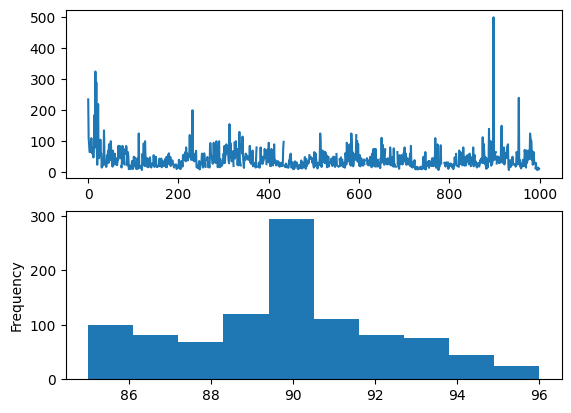

In [34]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(2)

wine.iloc[:1000, :].loc[:, 'price'].plot(ax=axes[0])

wine.iloc[:1000, :].loc[:, 'points'].plot(ax=axes[1], kind='hist')